<h1>
  <span style="color:lime;">ACTIVITY 2:</span>
  <span>UK ACCIDENT DATA ANALYTICS PROJECT</span>
</h1>

<hr>

<h3> ANALYST: Dwight Francis M. Caña

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [2]:
UA = pd.read_csv('uk_accident_data.csv')

In [3]:
UA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [4]:
UA.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [5]:
UA.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

<hr>
<h2> FILLING MISSING VALUES/NULL VALUES

In [6]:
for num in ['Latitude', 'Longitude']:
    UA[num] = UA[num].fillna(UA[num].mean())
    
for oth in ['Road_Surface_Conditions', 'Urban_or_Rural_Area', 'Weather_Conditions']:
    UA[oth] = UA[oth].fillna(UA[oth].mode()[0])

UA['Road_Type'] = UA['Road_Type'].fillna('Unknown')

In [7]:
UA.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [8]:
UA['Index'] = UA['Index'].astype('category')
UA['Accident_Severity'] = UA['Accident_Severity'].astype('category')
UA['Accident Date'] = UA['Accident Date'].astype('str')
UA['Accident Date'] = UA['Accident Date'].str.replace('/', '-')
UA['Accident Date'] = pd.to_datetime(UA['Accident Date'], dayfirst = True, errors='coerce')
UA['Latitude'] = UA['Latitude'].astype('float')
UA['Longitude'] = UA['Longitude'].astype('float')
UA['Light_Conditions'] = UA['Light_Conditions'].astype('category')
UA['District Area'] = UA['District Area'].astype('category')
UA['Number_of_Casualties'] = UA['Number_of_Casualties'].astype('int')
UA['Number_of_Vehicles'] = UA['Number_of_Vehicles'].astype('int')
UA['Road_Surface_Conditions'] = UA['Road_Surface_Conditions'].astype('category')
UA['Road_Type'] = UA['Road_Type'].astype('category')
UA['Urban_or_Rural_Area'] = UA['Urban_or_Rural_Area'].astype('category')
UA['Weather_Conditions'] = UA['Weather_Conditions'].astype('category')
UA['Vehicle_Type'] = UA['Vehicle_Type'].astype('category')

In [9]:
UA['Year'] = UA['Accident Date'].dt.year
UA['Month'] = UA['Accident Date'].dt.month
UA['Month_Name'] = UA['Accident Date'].dt.month_name()
UA['Date'] = UA['Accident Date'].dt.day
UA['Day'] = UA['Accident Date'].dt.day_name()
UA['Week'] = UA['Accident Date'].dt.isocalendar().week

In [10]:
UA.dtypes

Index                            category
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
Year                                int32
Month                               int32
Month_Name                         object
Date                                int32
Day                                object
Week                               UInt32
dtype: object

In [11]:
UA[['Accident Date', 'Year', 'Month', 'Month_Name', 'Date', 'Day', 'Week']].value_counts()

Accident Date  Year  Month  Month_Name  Date  Day        Week
2019-11-30     2019  11     November    30    Saturday   48      704
2019-01-31     2019  1      January     31    Thursday   5       697
2021-11-13     2021  11     November    13    Saturday   45      692
2019-07-13     2019  7      July        13    Saturday   28      692
2019-08-14     2019  8      August      14    Wednesday  33      688
                                                                ... 
2022-12-30     2022  12     December    30    Friday     52      171
2019-12-25     2019  12     December    25    Wednesday  52      157
2022-12-25     2022  12     December    25    Sunday     51      145
2022-01-10     2022  1      January     10    Monday     2       123
2020-12-25     2020  12     December    25    Friday     52      118
Name: count, Length: 1461, dtype: int64

<hr>
<h2 style= "color:yellow">Data Analysis Questions</h2>

<h3>1. What kind of roads are most commonly involved in accidents?</h3>

In [12]:
UA["Road_Type"].value_counts().sort_values(ascending=False)

Road_Type
Single carriageway    492143
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
Unknown                 4520
Name: count, dtype: int64

<h4> No.1 insght:</h4>
<p> The road types with the most accidents are single carrieageway. This may be due to more active use or general negligence of safety when in a straight forward road</p>
<hr>

<h4> No.2 insght:</h4>
<p> Comparatively roundabout's having the least as uncommon they may be still managing 43k accidents</p>
<hr>

<h3> 2. What weather condition does classsified has the most chance of fatality?

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Fine + high winds'),
  Text(1, 0, 'Fine no high winds'),
  Text(2, 0, 'Fog or mist'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Raining + high winds'),
  Text(5, 0, 'Raining no high winds'),
  Text(6, 0, 'Snowing + high winds'),
  Text(7, 0, 'Snowing no high winds')])

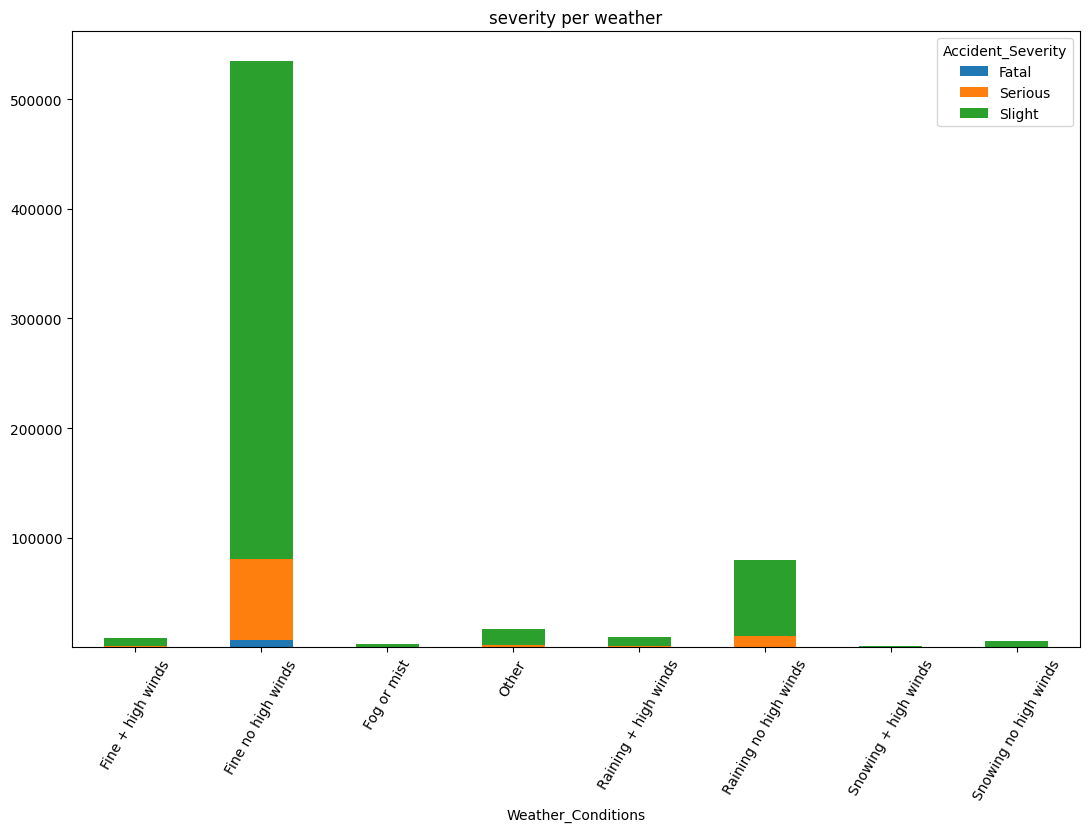

In [13]:
UAF=UA.groupby(["Weather_Conditions","Accident_Severity"]).size().unstack()
UAF.plot(kind='bar',stacked=True)
plt.title("severity per weather")
plt.gcf().set_size_inches(13,8)
plt.xticks(rotation=60)

<h4> No.3 insght:</h4>
<p>Most accidents happened during fine weather. this is most probably because of the type of weather where the roads are most active and not necesarily the cause of the accidents</p>


<h4> No.4 insght:</h4>
<p>On the opposite end, theres barely any accidents in snowy as most people would avoid driving in those extreme weather, comparatively with raining with no winds is danagerous but not anough to diswave people from driving</p>


<h4> No.5 insght:</h4>
<p>As the accidents may be most prominent during fine no high winds. driver may tend to be complacent with the clear environment causing accidents as a result along with the increase 
    traffic </p>
<hr>

<h3> 3. Whats the average number of casulties of urban compared to rural areas </h3>

In [14]:
cm = UA.groupby("Urban_or_Rural_Area")["Number_of_Casualties"].mean()
cas = cm.sort_values(ascending=False).to_frame()

cas["Percentage"] = (cas["Number_of_Casualties"] /
                               cas["Number_of_Casualties"].sum() * 100).round(1)

cas["Percentage"] = cas["Percentage"].astype(str) + "%"

cas


,Number_of_Casualties,Percentage
Urban_or_Rural_Area,,
Rural,1.479204,37.5%
Urban,1.287807,32.6%
Unallocated,1.181818,29.9%


<h4> No.6 insght:</h4>
<p>Rural has higher number of casualties.This suggests that rural accidents tend to be more severe, possibly due to higher speeds or less safe road conditions.
</p>
<hr>

<h1> 5. Does light conditions affect accident severity?</h1>

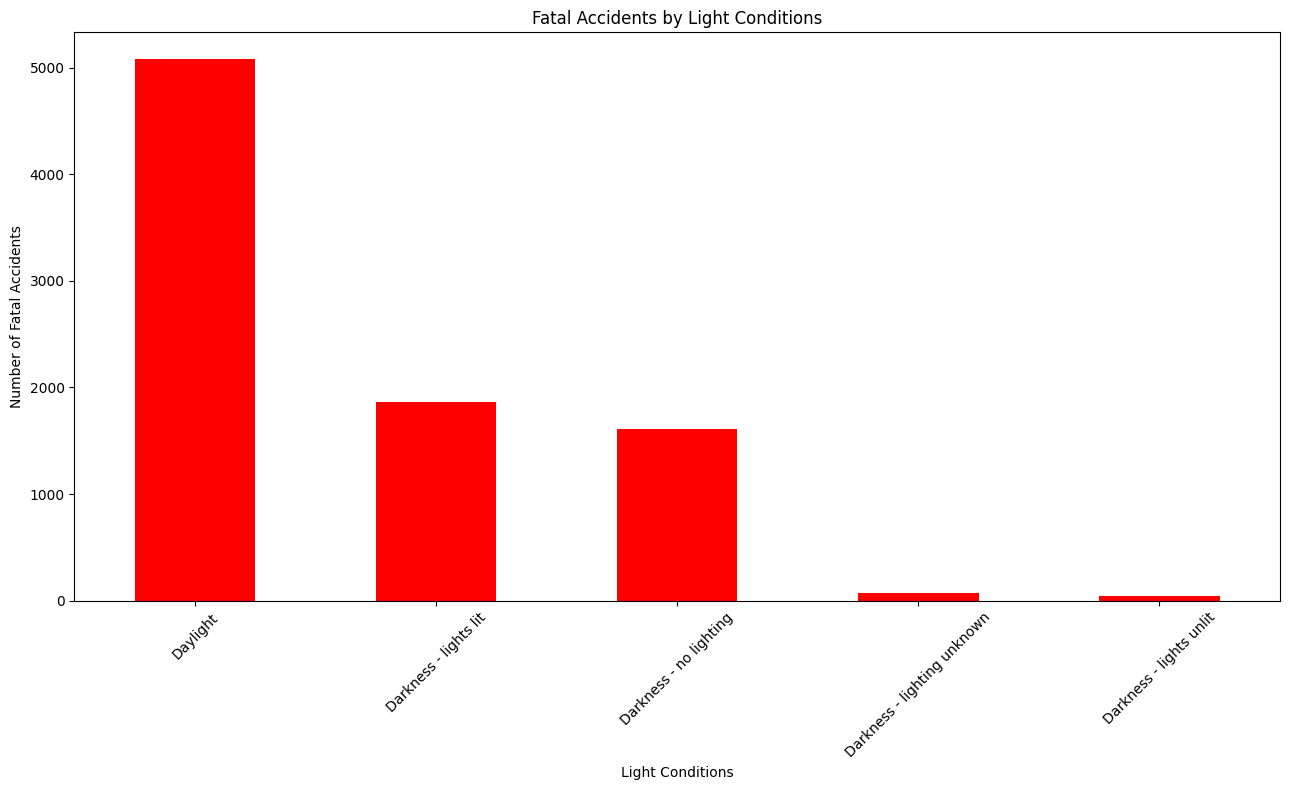

In [20]:
af = UA[UA['Accident_Severity'] == "Fatal"]
lc = af['Light_Conditions'].value_counts()
lc.plot(
    kind='bar',
    color='red'
)
plt.title("Fatal Accidents by Light Conditions")
plt.gcf().set_size_inches(13,8)
plt.xlabel("Light Conditions")
plt.ylabel("Number of Fatal Accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h4> No.7 insght:</h4>
<p>Daylight having the most Fatal accidents whilst Darkness with light and No light is the second contributing cause of fatality in the category which is common, because visibility greatly contribute to the safety in terms of driving, the activeness of driving in daylight cause more accident due to just having more vehicles on the road</p>
<hr>

<h3> 6. Correlation of number of vehicles involved in accidents?

In [23]:
cv = UA["Number_of_Casualties"].corr(UA["Number_of_Vehicles"])
cv

np.float64(0.2288888612692756)

<h4> No.8 insght:</h4>
<p> Accidents with more vehicles tend to have slightly more casualties.
</p>
<hr>


<h3> 8. Has the number of casualties changed over time?

In [24]:
UA["Accident Date"] = pd.to_datetime(UA["Accident Date"], errors='coerce')
UA = UA.dropna(subset=["Accident Date"])
UA["Date_num"] = UA["Accident Date"].map(pd.Timestamp.toordinal)

corr_value = UA["Date_num"].corr(UA["Number_of_Casualties"])
corr_percentage = round(corr_value * 100, 1)
print(f"Correlation: {corr_percentage}%")

Correlation: -0.1%


<h4> No.9 insght:</h4>
<p>Over time the number of accidents remains constant and not having any noticiable difference
</p>

<h4> No.10 insght:</h4>
<p>The accidents in the timeframe of the data has seen no improvements or/and to driver safety rules
</p>
<hr>

<h3>9. Which types of roads are most commonly involved in accidents? 

In [25]:
road_counts = UA["Road_Type"].value_counts().sort_values(ascending=False).to_frame(name="Count")
road_counts["Percentage"] = (road_counts["Count"] / road_counts["Count"].sum() * 100).round(1).astype(str) + "%"
road_counts

,Count,Percentage
Road_Type,,
Single carriageway,492143,74.5%
Dual carriageway,99424,15.0%
Roundabout,43992,6.7%
One way street,13559,2.1%
Slip road,7041,1.1%
Unknown,4520,0.7%



<h4> No.11 insght:</h4>
<p>This suggests that single carriageways are the most accident-prone, accounting for about 74.5% of all accidents. This may be due to higher traffic density, limited overtaking opportunities, or narrower lanes.
</p>
<hr>

<h3> 13. Do different districts show different casualty numbers? </h3>

In [27]:
anova_result = f_oneway(*[g["Number_of_Casualties"].values for _, g in UA.groupby("District Area")])
print(f"F-statistic: {anova_result.statistic:.3f}, p-value: {anova_result.pvalue:.6f}")

F-statistic: 24.100, p-value: 0.000000


<h4>No.12 insight</h4>
<p>There is a significant difference in the average number of casualties beetween different districts, meaning location has a clear effect on accident outcomes.</p>


<h4>No.13 insight</h4>
<p>this might be due to the population density of the area and the developement level of the the roads</p>


<h3> 14. Which road surface leads to the highest casualties?</h3>

In [29]:
road_surface_casualties = UA.groupby("Road_Surface_Conditions")["Number_of_Casualties"].mean().sort_values(ascending=False).to_frame()
road_surface_casualties["Percentage_of_Max"] = (road_surface_casualties["Number_of_Casualties"] / road_surface_casualties["Number_of_Casualties"].max() * 100).round(1).astype(str) + "%"

road_surface_casualties

,Number_of_Casualties,Percentage_of_Max
Road_Surface_Conditions,,
Flood over 3cm. deep,1.495575,100.0%
Wet or damp,1.411064,94.3%
Snow,1.359593,90.9%
Frost or ice,1.348815,90.2%
Dry,1.334545,89.2%


<h4>No.14 insight</h4>
<p>floods with over 3cm deep have the highest average casualties. followed by wet, snowy, or icy, and so on</p>

<h4>No.15 insight</h4>
<p>as dricing during floods may have been last resorts that resulted in having casualties</p>
<hr>

<h3>15. What is the trend of average vehicles per accident across different years?</h3>

In [30]:
vehicle_year = UA.groupby(UA["Accident Date"].dt.year)["Number_of_Vehicles"].mean().to_frame(name="Average_Vehicles")
max_value = vehicle_year["Average_Vehicles"].max()
vehicle_year["Percentage_of_Max"] = (vehicle_year["Average_Vehicles"] / max_value * 100).round(1).astype(str) + "%"

vehicle_year

,Average_Vehicles,Percentage_of_Max
Accident Date,,
2019,1.839310,100.0%
2020,1.826615,99.3%
2021,1.826229,99.3%
2022,1.832273,99.6%


<h4>No.16 insight</h4>
<p>Over the years theres not much changes to the number of vehicles involve in accidents</p>
<hr>

<h3>16. what month has the highest case of accident on average

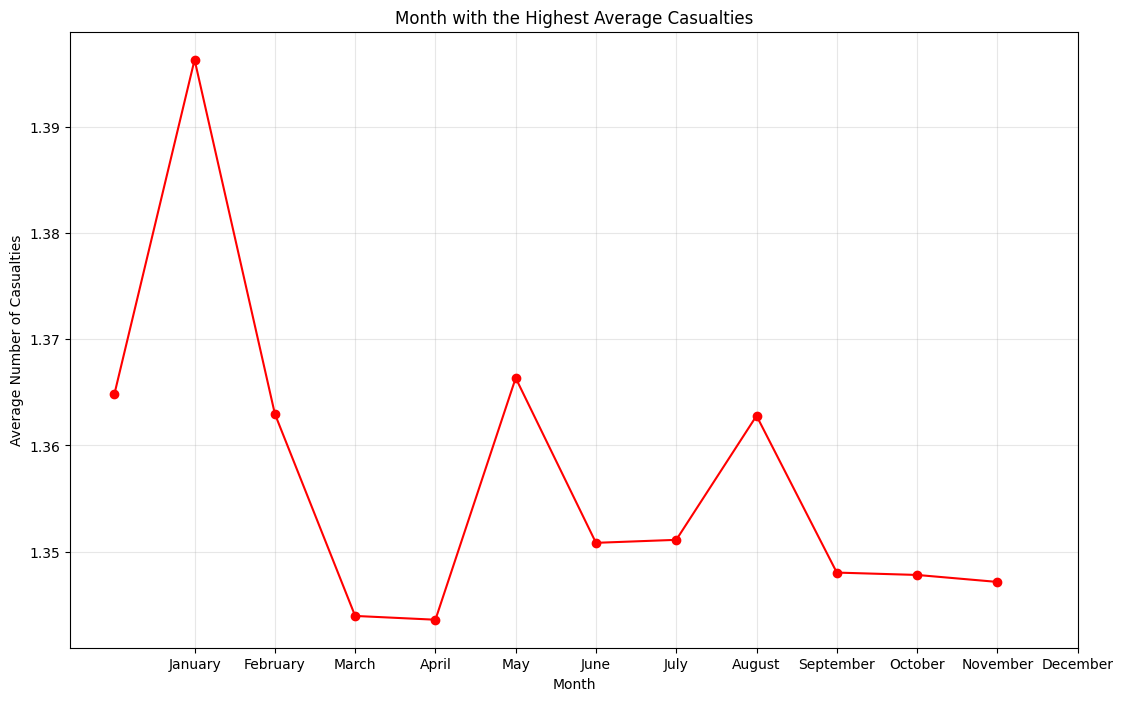

In [40]:
lineee = UA.groupby('Month')['Number_of_Casualties'].mean()

lineee.plot(
    marker='o',
    title='Month with the Highest Average Casualties',
    color='red'
)
plt.xticks(
    range(1,13),
    ['January','February','March','April','May','June','July',
     'August','September','October','November','December']
)
plt.xlabel("Month")
plt.gcf().set_size_inches(13,8)
plt.ylabel("Average Number of Casualties")
plt.grid(alpha=0.3)
plt.show()

<h4>No.17 insight</h4>
<p>Jan has the most casualties all year around but overall not much difference</p>
<hr>

<h3>17. Are there outliers in vehicle types?

In [34]:
rare = UA["Vehicle_Type"].value_counts().nsmallest(5).to_frame(name="Count")
total = rare["Count"].sum()
rare["Percentage"] = (rare["Count"] / total * 100).round(1).astype(str) + "%"
rare

,Count,Percentage
Vehicle_Type,,
Ridden horse,4,0.1%
Data missing or out of range,6,0.1%
Pedal cycle,197,4.8%
Agricultural vehicle,1947,47.1%
Minibus (8 - 16 passenger seats),1976,47.8%


<h4>No.18 insight</h4>
<p>There has been cases with horse related accidents in roads, random presumely self made vehicles as the data is missing, and not motor vehicles</p>
<hr>

<h3> 18. Which year and month recorded the highest number of accidents?

In [35]:
UA["Accident Date"] = pd.to_datetime(UA["Accident Date"])
UA["Year"] = UA["Accident Date"].dt.year
UA["Month"] = UA["Accident Date"].dt.month_name()

year_month_counts = UA.groupby(["Year", "Month"]).size().to_frame(name="Count")
highest_accident_period = year_month_counts.sort_values(by="Count", ascending=False).head(5)

highest_accident_period

Count
Year Month          
2019 November  16559
     July      15862
     May       15833
2020 October   15684
2019 October   15528

<h4>No.19 insight</h4>
<p>Nov having the most case. This spike may be linked to holiday-related travel and gatherings, alongside seasonal factors like shorter days and adverse weather.</p>

<h4>No.20 insight</h4>
<p>Nov having the most case. while Jan may have the more casualties over all. As this is the season of hollidays and winter resulting in more cold/wet roadtypes</p>
<hr>

<h3>19. Which day of the week in November records the most accidents?

In [ ]:
UA["Accident Date"] = pd.to_datetime(UA["Accident Date"])
november_data = UA[UA["Accident Date"].dt.month == 11].copy()

november_data["Day_Name"] = november_data["Accident Date"].dt.day_name()
november_counts = november_data.groupby("Day_Name").size().to_frame(name="Accident_Count")

total_accidents = november_counts["Accident_Count"].sum()
november_counts["Percentage"] = (november_counts["Accident_Count"] / total_accidents * 100).round(1).astype(str) + "%"

day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
november_counts = november_counts.reindex(day_order)

november_counts

<h4>No.21 insight</h4>
<p>The analysis shows that Saturday has the highest number of accidents in November, with 10,301(17%) cases. This suggests weekends may be more accident-prone, possibly due to increased leisure travel, social activities, and late-night driving.</p>
<hr>

<h3>20. Are there any changes over the total number of accidents per year?

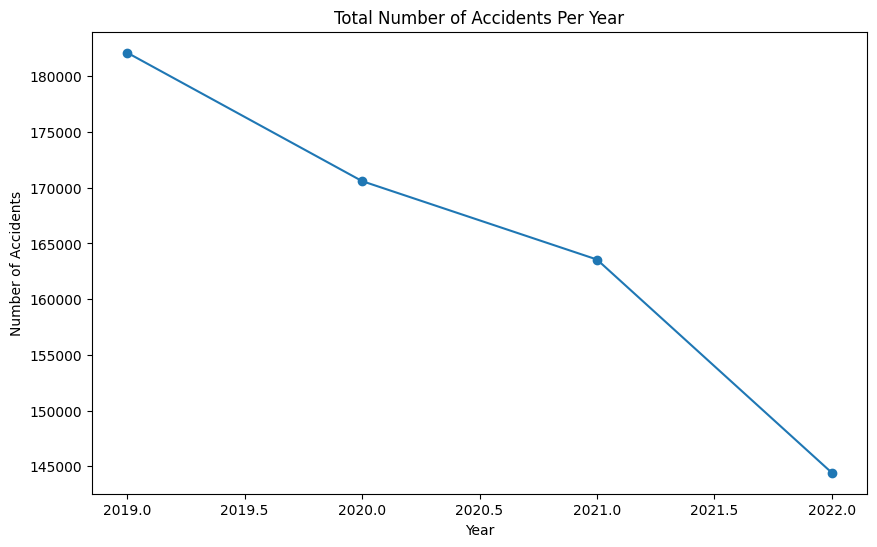

Year
2019    182115
2020    170591
2021    163554
2022    144419
dtype: int64

In [37]:
yearly_accidents = UA.groupby('Year').size()
yearly_accidents.plot(kind='line', marker='o', figsize=(10,6))
plt.title("Total Number of Accidents Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.show()
yearly_accidents

<h4>No.22 insight</h4>
<p>There has been a significant decline of accidents over the years</p>
<hr>

<h3> 21. Which are the top 3 vehicle types most commonly involved in accidents in 2021?</h3>

In [45]:
accidents_2021 = UA[UA["Year"] == 2021]

In [47]:
vehicle_counts_2021 = accidents_2021["Vehicle_Type"].value_counts().head(5)
vehicle_percent_2021 = (vehicle_counts_2021 / vehicle_counts_2021.sum() * 100).round(1)

vehicle_table_2021 = pd.DataFrame({
    "Accident_Count": vehicle_counts_2021,
    "Percentage_of_2021": vehicle_percent_2021
}).reset_index().rename(columns={"index": "Vehicle_Type"})

vehicle_table_2021

,Vehicle_Type,Accident_Count,Percentage_of_2021
0,Car,128026,85.4
1,Van / Goods 3.5 tonnes mgw or under,8106,5.4
2,Motorcycle over 500cc,6110,4.1
3,Bus or coach (17 or more pass seats),4155,2.8
4,Goods 7.5 tonnes mgw and over,3569,2.4


<h4>No.23 insight</h4>
<p>The most common accidents are primarily cars. makes you wonder on the istigma motorcyles driving recklessly
<hr>

<h3>22. Speaking of motorcycles. On which road types are motorcycles accidents most common?</h1>

In [48]:
motorcycle_accidents = UA[UA["Vehicle_Type"].str.contains("Motorcycle")]

motorcycle_road_percent = pd.crosstab(
    motorcycle_accidents["Vehicle_Type"],
    motorcycle_accidents["Road_Type"],
    normalize='index'
) * 100

motorcycle_road_percent = motorcycle_road_percent.round(1)
motorcycle_road_percent

Road_Type,Dual carriageway,One way street,Roundabout,Single carriageway,Slip road,Unknown
Vehicle_Type,,,,,,
Motorcycle 125cc and under,14.6,2.0,6.5,75.4,1.0,0.6
Motorcycle 50cc and under,14.3,1.7,6.7,75.5,1.2,0.5
Motorcycle over 125cc and up to 500cc,15.8,2.0,6.4,73.9,1.3,0.5
Motorcycle over 500cc,15.3,1.9,6.8,74.2,1.1,0.6


<h4>No.23 insight</h4>
<p>All motorcycle types have the majority of accidents on single carriageway (74–76%), followed bydual carriageways (14–16%) and roundabouts (6–7%). Very few accidents occur on one-way streets, slip roads, or unknown road types. 
This highlights that motorcycles are most at risk on rural or high-speed roads.</p>


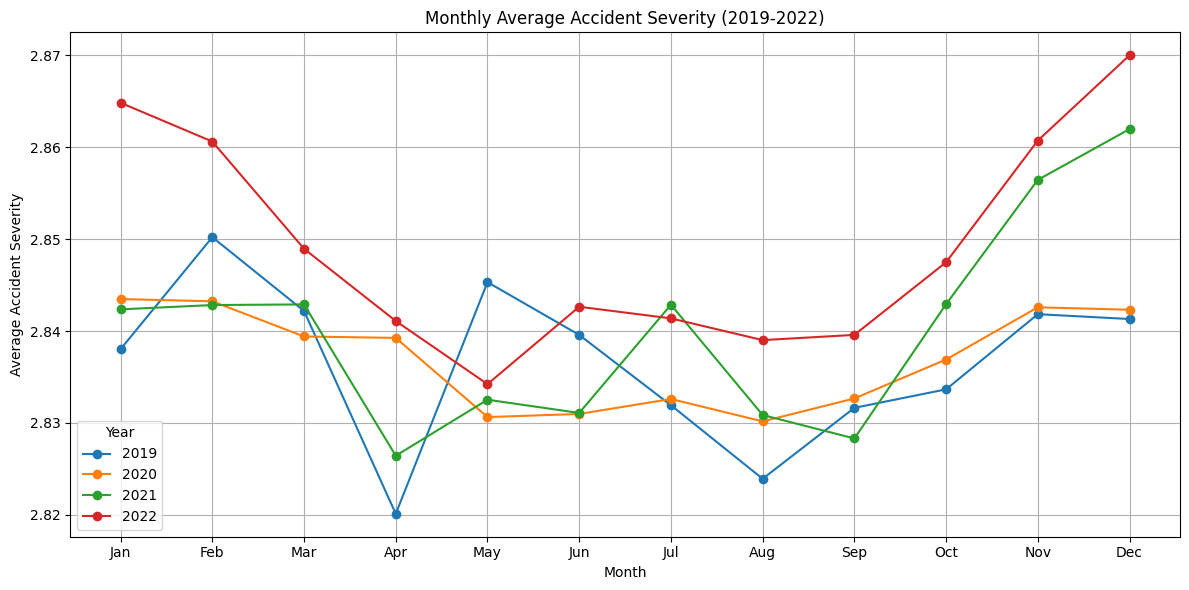

In [41]:
UA["Accident Date"] = pd.to_datetime(UA["Accident Date"])
UA["Year"] = UA["Accident Date"].dt.year
UA["Month_Num"] = UA["Accident Date"].dt.month

UA["Accident_Severity"] = UA["Accident_Severity"].astype("category").cat.codes + 1

DFL = UA[UA["Year"].between(2019, 2022)]

monthly_severity = DFL.groupby(["Year", "Month_Num"])["Accident_Severity"].mean().unstack(level=0)
monthly_severity = monthly_severity.reindex(range(1,13), fill_value=0)

month_labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

ax = monthly_severity.plot(kind="line", figsize=(12,6), marker='o')
ax.set_title("Monthly Average Accident Severity (2019-2022)")
ax.set_xlabel("Month")
ax.set_ylabel("Average Accident Severity")
ax.set_xticks(range(1,13))
ax.set_xticklabels(month_labels)
ax.grid(True)
plt.legend(title="Year")
plt.tight_layout()
plt.show()